# **Arbol de Clasificacion**

# **Datos a tomar en cuenta**


1. **Age**: Edad de la persona en años.

2. **Sex**: Sexo de la persona (M: masculino, F: femenino).

3. **ChestPainType**: Tipo de dolor en el pecho:
   - **TA**: Angina típica (dolor asociado con el esfuerzo físico).
   - **ATA**: Angina atípica (dolor no relacionado con el esfuerzo).
   - **NAP**: Dolor no anginoso (dolor en el pecho que no es por angina).
   - **ASY**: Asintomático (sin síntomas de dolor en el pecho).
   

4. **RestingBP**: Presión arterial en reposo (en mm Hg).

5. **Cholesterol**: Nivel de colesterol sérico en mg/dL.

6. **FastingBS**: Nivel de azúcar en sangre en ayunas (1 si el nivel es mayor a 120 mg/dL, 0 en caso contrario).

7. **RestingECG**: Resultados del electrocardiograma en reposo:
   - **Normal**: Electrocardiograma normal.
   - **ST**: Anormalidad en la onda ST-T (posible indicación de un problema cardíaco).
   - **LVH**: Hipertrofia ventricular izquierda (engrosamiento de las paredes del corazón).


8. **MaxHR**: Frecuencia cardíaca máxima alcanzada durante el ejercicio.

9. **ExerciseAngina**: Angina inducida por el ejercicio (Y: sí, N: no).

10. **Oldpeak**: Depresión del ST (diferencia en el nivel del segmento ST durante el esfuerzo comparado con el reposo, medido en mm).

11. **ST_Slope**: Pendiente del segmento ST durante el ejercicio:
    - **Up**: Ascendente.
    - **Flat**: Plana.
    - **Down**: Descendente.

    
12. **HeartDisease**: Enfermedad cardíaca (1: presencia de enfermedad cardíaca, 0: ausencia).

Estas columnas forman parte de un dataset relacionado con la salud cardíaca y se usan comúnmente para predecir la presencia de enfermedades cardíacas.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
df = pd.read_csv('heart.csv')
df_selected = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 
                    'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']]


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [26]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## **Limpieza**

In [27]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [29]:
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [30]:
print(df['Age'].unique(), "Age")
print(df['Sex'].unique(), "Sex")
print(df['ChestPainType'].unique(), "ChestPainType")
print(df['RestingBP'].unique(), "RestingBP")
print(df['Cholesterol'].unique(), "Cholesterol")
print(df['FastingBS'].unique(), "FastingBS")
print(df['RestingECG'].unique(), "RestingECG")
print(df['MaxHR'].unique(), "MaxHR")
print(df['ExerciseAngina'].unique(), "ExerciseAngina")
print(df['Oldpeak'].unique(), "Oldpeak")
print(df['ST_Slope'].unique(), "ST_Slope")
print(df['HeartDisease'].unique(), "HeartDisease")

[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71] Age
['M' 'F'] Sex
['ATA' 'NAP' 'ASY' 'TA'] ChestPainType
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164] RestingBP
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285

In [31]:
mappings = {
    'Sex': {'M': 1, 'F': 2},
    'ChestPainType': {'ATA': 1, 'NAP': 2, 'ASY': 3, 'TA': 4},
    'RestingECG': {'Normal': 1, 'ST': 2, 'LVH': 3},
    'ExerciseAngina': {'N': 1, 'Y': 2},
    'ST_Slope': {'Up': 1, 'Flat': 2, 'Down': 3}
}

df.replace(mappings, inplace=True)

C:\Users\raMIZ\AppData\Local\Temp\ipykernel_5160\1574090162.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mappings, inplace=True)


## **Visualizacion de datos**

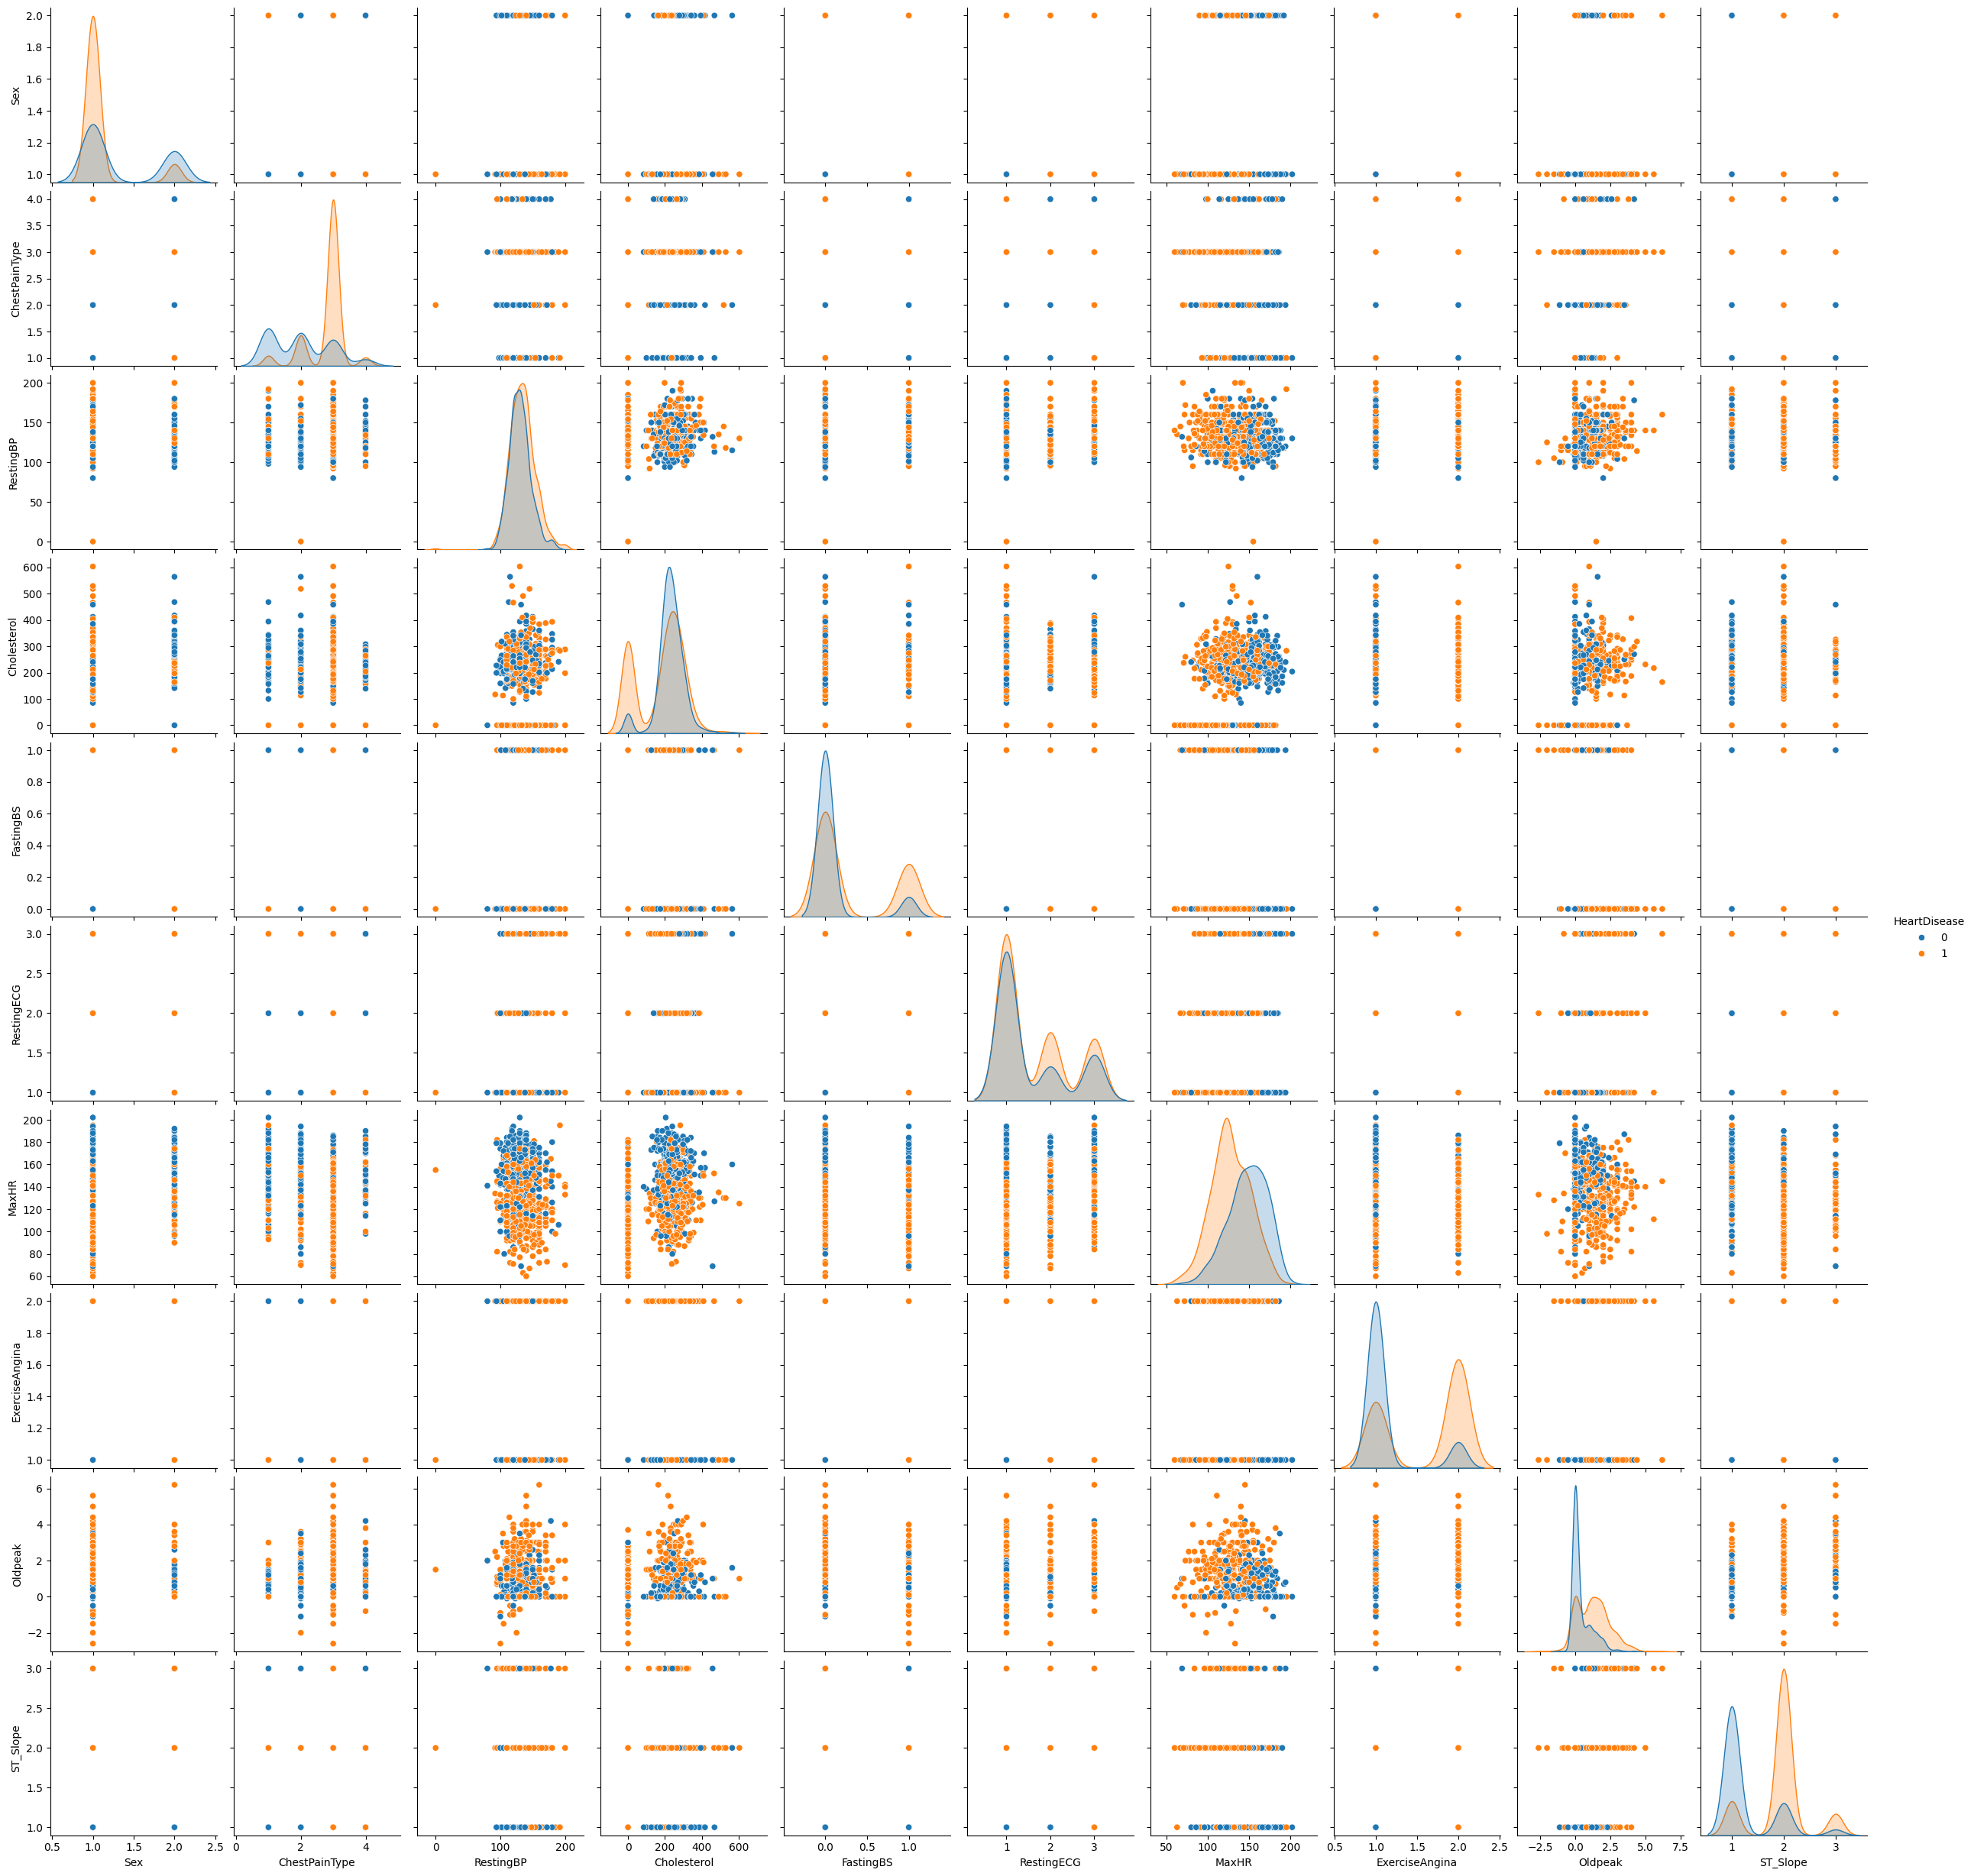

In [32]:
sns.pairplot(df.iloc[:,1:],hue='HeartDisease')  

**<h2>Entrenamiento de un modelo de regresión</h2>**

In [33]:
df = shuffle(df, random_state=1)

In [34]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
900,58,1,3,114,318,0,2,140,1,4.4,3,1
570,56,1,3,128,223,0,2,119,2,2.0,3,1
791,51,1,3,140,298,0,1,122,2,4.2,2,1
189,53,1,3,180,285,0,2,120,2,1.5,2,1
372,63,1,3,185,0,0,1,98,2,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
767,54,2,2,108,267,0,3,167,1,0.0,1,0
72,52,1,3,120,182,0,1,150,1,0.0,2,1
908,63,1,3,140,187,0,3,144,2,4.0,1,1
235,39,1,1,120,200,0,1,160,2,1.0,2,0


In [35]:
variables = ['ST_Slope', 'MaxHR', 'Cholesterol', 'Oldpeak', 'ChestPainType', 'RestingBP', 
                'Age', 'Sex', 'ExerciseAngina', 'FastingBS','RestingECG']

X = df[variables]
y = df['HeartDisease']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
model = DecisionTreeClassifier(random_state=10, max_depth=3)

In [51]:
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [52]:
y_pred = model.predict(X_test_scaled)

**<h2>Evaluación del modelo</h2>**

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: %.2f' % accuracy)

Precisión del modelo: 0.83


In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

Matriz de confusión:
[[73 18]
 [14 79]]


## **Visualizacion del Arbol de Clasificacion**

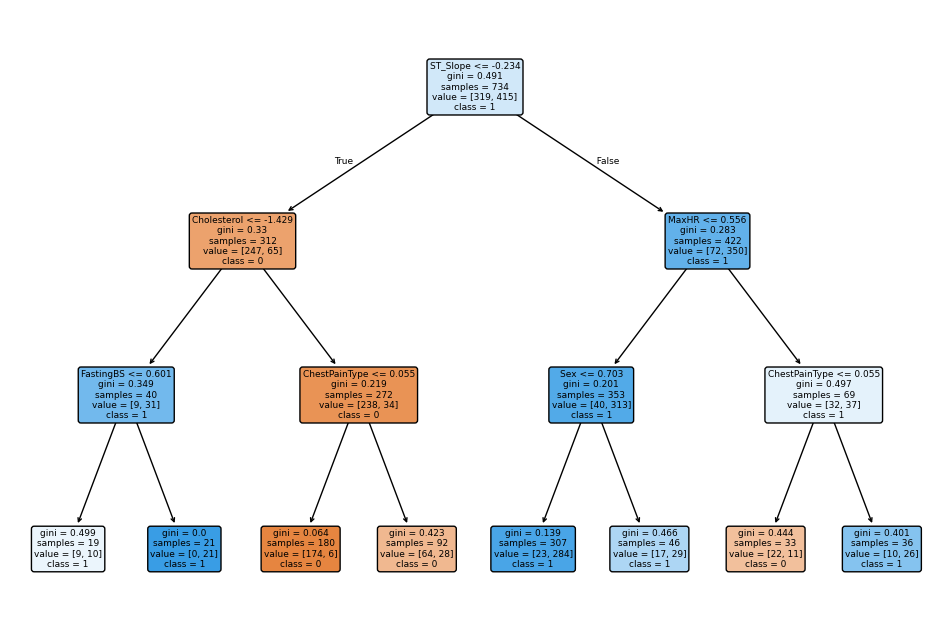

In [53]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=[str(cls) for cls in model.classes_], filled=True, rounded=True)
plt.show()


# **Prediccion Futura**

In [22]:
Age = 50
Sex = 1  # 1 para 'M', 2 para 'F'
ChestPainType = 1  # Ajusta según tu necesidad
RestingBP = 120
Cholesterol = 200
FastingBS = 0
RestingECG = 1  # 1: Normal, 2: ST, 3: LVH
MaxHR = 130
ExerciseAngina = 2  # 1: No, 2: Sí
Oldpeak = 1.5
ST_Slope = 1  # 1: Up, 2: Flat, 3: Down


# Valores futuros
new_samples = np.array([[Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope]])

# Escala las características de las nuevas muestras utilizando el escalador entrenado
X_new_scaled = scaler.transform(new_samples)

# Realiza predicciones en las nuevas muestras utilizando el modelo de árbol de decisión
y_pred_new = model.predict(X_new_scaled)

# y_pred_new contiene las etiquetas de clase predichas para las nuevas muestras
print(f"La Clasificación de HeartDisease es: {y_pred_new[0]}")


La Clasificación de HeartDisease es: 1


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
